## 이미지 준비

In [1]:
import os

In [3]:
os.system("mkdir -p ~/aiffel/human_segmentation/models")
os.system("mkdir -p ~/aiffel/human_segmentation/images")
os.system("ln -s ~/data/* ~/aiffel/human_segmentation/images")

ln: failed to create symbolic link '/aiffel/aiffel/human_segmentation/images/my_image.png': File exists


256

In [4]:
# os: Operating System의 줄임말로, 운영체제에서 제공되는 여러 기능을 파이썬에서 사용할 수 있도록 함 (Ex. 디렉토리 경로 이동, 시스템 환경 변수 가져오기 등)
# urllib: URL 작업을 위한 여러 모듈을 모은 패키지. (Ex. urllib.request, urllib.parse, ...)
# cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
# numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리. 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
# pixellib: 이미지 및 비디오 segmentation을 수행하기 위한 라이브러리. 
# pixellib.semantic: segmentation 기법 중, semantic segmentation을 쉽게 사용할 수 있도록 만든 라이브러리
# matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('슝=3')

슝=3


(500, 892, 3)


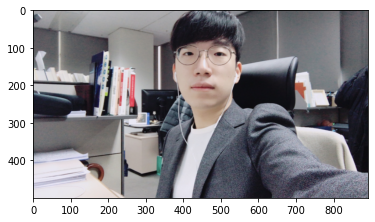

In [5]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

## DeepLab 모델 사용

### 모델 준비

In [6]:
# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x78b2c1429850>)

In [7]:
#PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model = semantic_segmentation()
# pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출
model.load_pascalvoc_model(model_file) 

### 모델 호출

In [8]:
# segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용
segvalues, output = model.segmentAsPascalvoc(img_path)

In [9]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

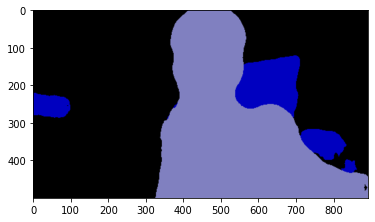

In [10]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [11]:
# segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력
segvalues

{'class_ids': array([ 0,  9, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]])}

In [36]:
segvalues['masks'].shape

(500, 892)

```
'class_ids': array([ 0,  9, 15]
```
- 0: 배경
- 9: 의자
- 15: 사람

### 결과 컬러맵

In [12]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [13]:
#컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)
colormap[15]

array([192, 128, 128])

In [14]:
# 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서
seg_color = (128,128,192)

(500, 892)


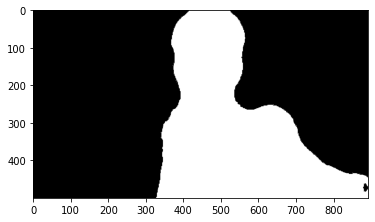

In [15]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

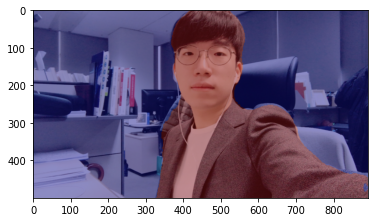

In [16]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### 배경 흐리기

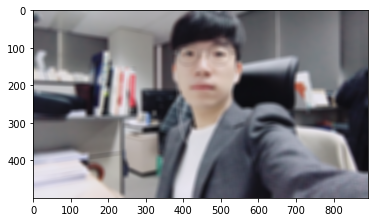

In [17]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13,13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

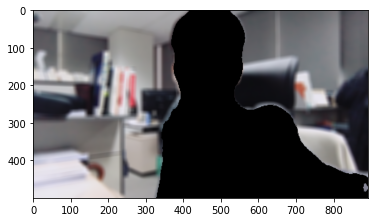

In [50]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

### 배경 인물 합성

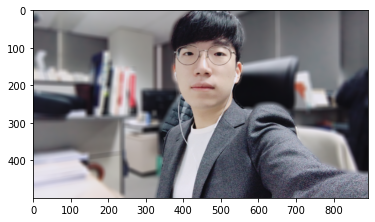

In [19]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

(500, 892)


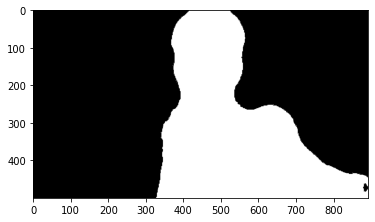

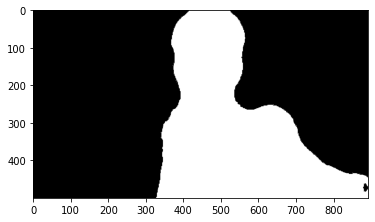

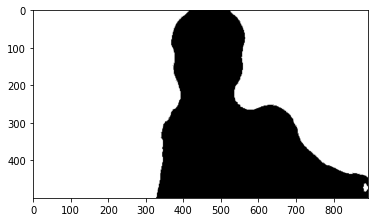

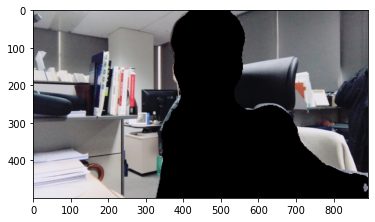

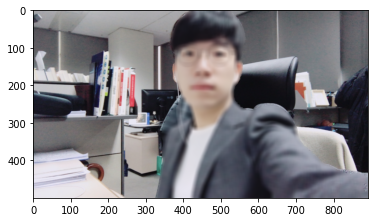

In [56]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()
img_show = img_orig.copy()

# img_mask = seg_map.astype(np.uint8) * 255
# img_orig_blur_2 = cv2.blur(img_orig, (13,13))
# seg_map_2 = (seg_map.astype(np.uint8)*-1)+1
# img_mask_2 = seg_map_2 * 255
img_mask_2 = seg_map.astype(np.uint8) * 255
# print(img_mask_2[:,400], len(img_mask_2[:,400]))

plt.imshow(img_mask_2, cmap='gray')
plt.show()

img_mask_color_2 = cv2.cvtColor(img_mask_2, cv2.COLOR_GRAY2BGR)
# print(img_mask_color_2[0])

img_bg_mask_2 = cv2.bitwise_not(img_mask_color_2)
# img_bg_mask_2 = img_mask_color_2
plt.imshow(img_bg_mask_2)
plt.show()

img_bg_blur_2 = cv2.bitwise_and(img_orig, img_bg_mask_2)

plt.imshow(cv2.cvtColor(img_bg_blur_2, cv2.COLOR_BGR2RGB))
plt.show()

# Q. 이번에는 사람 부분을 블러로, 배경 부분을 원본으로 출력해볼까요?
# 힌트 : img_mask_color 옵션을 적절히 조정해주고, img_orig, img_orig_blur 를 활용하세요.
img_concat_2 = np.where(img_mask_color_2==255, img_orig_blur, img_bg_blur_2)
plt.imshow(cv2.cvtColor(img_concat_2, cv2.COLOR_BGR2RGB))
plt.show()

### 버전 확인

In [ ]:
# importlib: 사용자가 파이썬의 import 시스템과 상호작용하기 위한 API를 제공하는 내장 라이브러리
# 사용자는 import 함수의 구현 내용과, 실행에 필요한 하위 함수들을 이용해 필요에 맞는 임포터를 직접 구현하거나 임포트 관련 기능들을 자유롭게 사용할 수 있음
# importlib.metadata: 설치된 패키지 메타 데이터에 대한 접근을 제공하는 라이브러리.
# 해당 코드 블럭에서는 importlib.metadata 안에 있는 version() 함수를 이용하여 pixellib 라이브러리의 버전을 확인

from importlib.metadata import version
import cv2
import pixellib

print(cv2.__version__)
print(version('pixellib'))

# 프로젝트
## 프로젝트 목표
   - __인물, 고양이, 크로마키 배경합성__
   - __문제점 찾기; 결과이미지에 표시 후 첨부__
   - __해결방법 탐구;__
       - [ ] 바운딩 박스 검출을 선행해서 객체의 크기, 배경과의 분리 등을 도입해본다.
   - __간결한 코딩__
       
       - [X] 입력과 출력이 들어간 함수 선언
   - __사소한 튜닝들__
       - [X] blurring kernal size 변경
       - [X] 이미지를 저장해보기 `cv2.imwrite()`

(500, 892, 3)


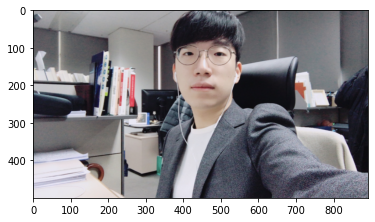

In [5]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x78b2c1429850>)

In [9]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

In [7]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file) 

In [62]:
# 컬러맵 재사용
classIdx=15
seg_color = np.take(colormap[classIdx],(2,1,0))
seg_color

array([128, 192, 128])

In [87]:
def shallowFocusPascalvoc(img_path, model, classIdx=15,
                         blurSize=(13,13)):
    '''
    모델과 이미지 경로를 전달받아 분류된 클래스에 해당하지 
    않는 부분에 아웃포커싱 적용
    '''
    # 원본 이미지 불러오기
    img_orig = cv2.imread(img_path) 
    # 모델의 분류기 호출
    segvalues, output = model.segmentAsPascalvoc(img_path)
    # 컬러맵 재사용, RGB- > BGR 변환 
    seg_color = np.take(colormap[classIdx], (2,1,0))
    # 분류 결과 output에서 클래스의 컬러맵과 일치하면 True
    seg_map = np.all(output==seg_color, axis=-1) 
    print(seg_map.shape)
    img_mask = seg_map.astype(np.uint8) * 255

    # (13,13)은 blurring kernel size
    img_orig_blur = cv2.blur(img_orig, blurSize)
    # 스칼라의 grey색 값을 BGR 벡터로 변환
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    print(img_mask_color.shape)

    img_concat = np.where(img_mask_color==255, img_orig, img_orig_blur)
    return img_concat

# 테스트용 코드
# test_result = shallowFocusPascalvoc(img_path, model, 15)

# plt.imshow(cv2.cvtColor(test_result, cv2.COLOR_BGR2RGB))
# plt.show()

In [80]:
person_path = os.getenv('HOME') \
        +'/aiffel/human_segmentation/images/a_person.jpg' 
dog_path = os.getenv('HOME') \
        +'/aiffel/human_segmentation/images/a_dog.jpg' 
horse_path = os.getenv('HOME') \
        +'/aiffel/human_segmentation/images/a_person_with_a_horse.jpg' 

In [92]:
person_path_sv = os.getenv('HOME') \
        +'/aiffel/human_segmentation/images/a_person_sf.jpg' 
dog_path_sv = os.getenv('HOME') \
        +'/aiffel/human_segmentation/images/a_dog_sf.jpg' 
horse_path_sv = os.getenv('HOME') \
        +'/aiffel/human_segmentation/images/a_person_with_a_horse_sf.jpg' 

(640, 640)
(640, 640, 3)


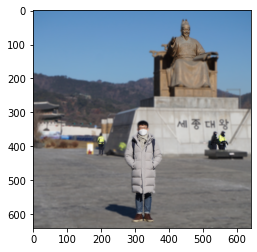

True

In [93]:
# Blurring kernel size를 (5,5)로 조정
person_img = shallowFocusPascalvoc(person_path, model,
                                   15, (5,5))
plt.imshow(cv2.cvtColor(person_img, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite(person_path_sv, person_img)

### 사람 외 분류의 개체

(640, 640)
(640, 640, 3)


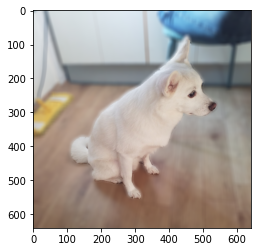

True

In [94]:
dog_img = shallowFocusPascalvoc(dog_path, model,
                            LABEL_NAMES.index('dog'),)
plt.imshow(cv2.cvtColor(dog_img, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite(dog_path_sv, dog_img)

(480, 640)
(480, 640, 3)


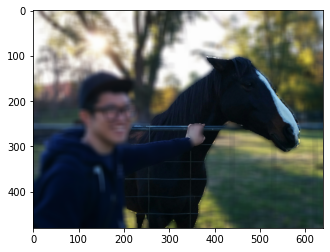

True

In [95]:
horse_img = shallowFocusPascalvoc(horse_path, model,
                                  LABEL_NAMES.index('horse'),)
plt.imshow(cv2.cvtColor(horse_img, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite(horse_path_sv, horse_img)

### 크로마키 합성

In [96]:
def chromaKeyPascalvoc(img_path, model, classIdx=15,
                       bg_img_path='', blurSize=(13,13)):
    '''
    모델과 이미지 경로를 전달받아 분류된 클래스에 해당하지
    않는 부분에 배경이미지 및 아웃포커싱 적용
    '''
    # 원본 이미지 불러오기
    img_orig = cv2.imread(img_path) 
    # 모델의 분류기 호출
    segvalues, output = model.segmentAsPascalvoc(img_path)
    # 컬러맵 재사용, RGB- > BGR 변환 
    seg_color = np.take(colormap[classIdx], (2,1,0))
    # 분류 결과 output에서 클래스의 컬러맵과 일치하면 True
    seg_map = np.all(output==seg_color, axis=-1) 
    print(seg_map.shape)
    img_mask = seg_map.astype(np.uint8) * 255

    # (13,13)은 blurring kernel size
    if len(bg_img_path) > 0:
        bg_img = cv2.imread(bg_img_path)
        # Ex3의 cv2.resize()를 이용해 원본과 배경이미지 크기 맞추기
        # 수영님의 팁: 벡터의 shape과 이미지의 shape은 x, y 순서가 반대
        bg_img = cv2.resize(bg_img, np.flip(seg_map.shape))
        img_orig_blur = cv2.blur(bg_img, blurSize)
    else:
        img_orig_blur = cv2.blur(img_orig, blurSize)
    # 스칼라의 grey색 값을 BGR 벡터로 변환
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    print(img_mask_color.shape)

    img_concat = np.where(img_mask_color==255, img_orig, img_orig_blur)
    return img_concat

(640, 640)
(640, 640, 3)


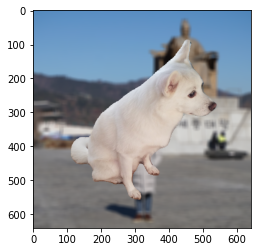

True

In [90]:

dog_w_person_path_sv = os.getenv('HOME') \
    +'/aiffel/human_segmentation/images/a_dog_w_a_person_sf.jpg' 


dog_w_person_img = chromaKeyPascalvoc(dog_path, model,
                     LABEL_NAMES.index('dog') ,person_path )

plt.imshow(cv2.cvtColor(dog_w_person_img, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite(dog_w_person_path_sv, dog_w_person_img)

(640, 640)
(640, 640, 3)


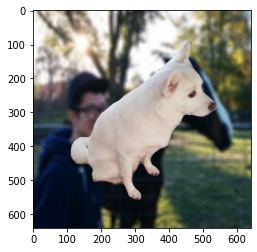

True

In [97]:

dog_w_horse_path_sv = os.getenv('HOME') \
    +'/aiffel/human_segmentation/images/a_dog_w_a_horse_sf.jpg' 


dog_w_horse_img = chromaKeyPascalvoc(dog_path, model,
                     LABEL_NAMES.index('dog') ,horse_path )

plt.imshow(cv2.cvtColor(dog_w_horse_img, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite(dog_w_horse_path_sv, dog_w_horse_img)